### Lab-4 Implement Linear Spatial Filtering using Built-in and user defined functions
1. Average Filer(Noise filtering)
2. Guassian Blur
3. Sharpening Filter(Laplace)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
image= cv2.imread('img4.jpg', 0)

In [3]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # for display

(-0.5, 1199.5, 629.5, -0.5)

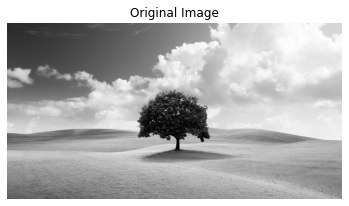

In [4]:
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

In [9]:
# Function to add Gaussian noise to an image using OpenCV built-in function
def add_gaussian_noise(image, mean=0, sigma=25):
    row, col= image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

In [10]:
# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(image)

Text(0.5, 1.0, 'Noisy Image')

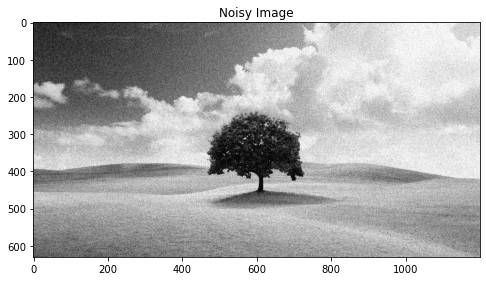

In [11]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')

### 1. Average Filter

In [12]:
# Built-in
denoised_image = cv2.blur(noisy_image, (5, 5))

Text(0.5, 1.0, 'Denoised Image (Average Filter)')

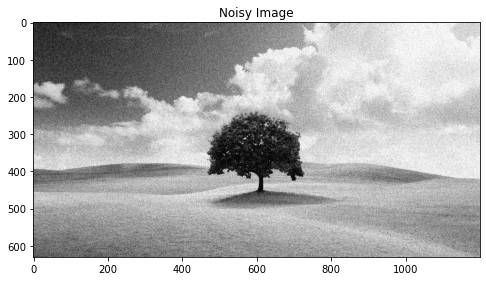

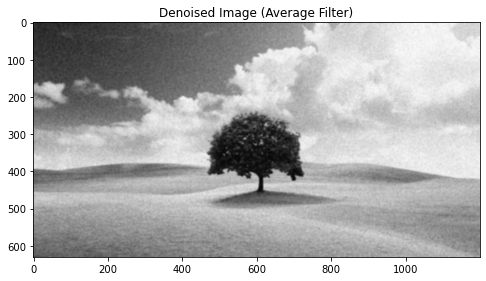

In [13]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Average Filter)')

In [14]:
# User-defined
def average_filter(image, kernel_size=(5, 5)):
    kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])
    return cv2.filter2D(image, -1, kernel)

In [15]:
denoised_image_custom =average_filter(noisy_image)

Text(0.5, 1.0, 'Denoised Image (Custom Average Filter)')

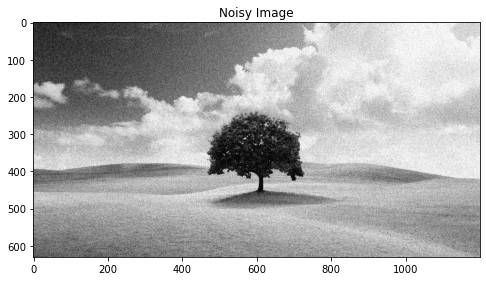

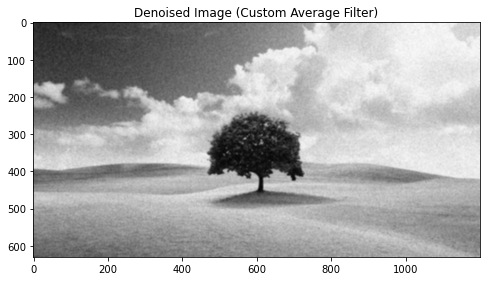

In [16]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(denoised_image_custom, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Custom Average Filter)')

### Guassian Blur

In [27]:
# Built-in function (using OpenCV)
gaussian_blur = cv2.GaussianBlur(noisy_image, (5, 5), 0)

In [28]:
# User-defined function
def gaussian_blur_custom(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

gaussian_blur_image = gaussian_blur_custom(noisy_image)

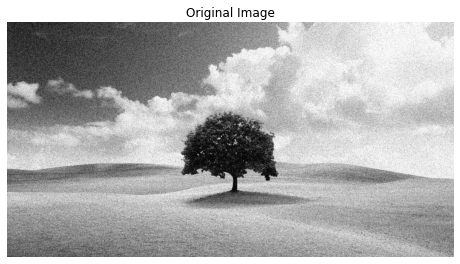

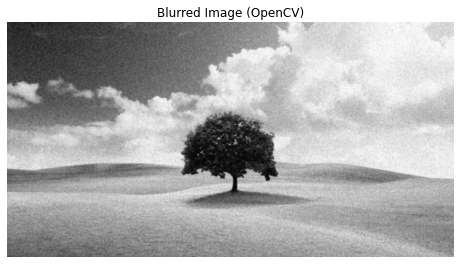

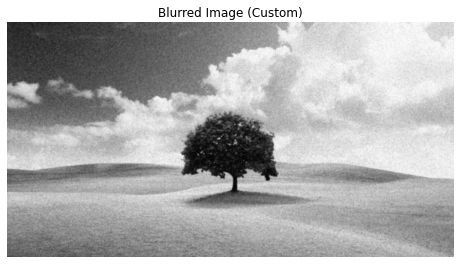

In [35]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.imshow(noisy_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.figure(figsize=(8, 6))
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Blurred Image (OpenCV)')
plt.axis('off')

plt.figure(figsize=(8, 6))
plt.imshow(gaussian_blur_image, cmap='gray')
plt.title('Blurred Image (Custom)')
plt.axis('off')

plt.show()


### 3. Sharpening Filter(Laplace)

In [38]:
image = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)

In [41]:
laplacian = np.uint8(np.absolute(laplacian))

In [42]:
# Adding the Laplacian result to the original image for sharpening
sharpened_image = cv2.addWeighted(image, 1.5, laplacian, -0.5, 0)

(-0.5, 1199.5, 629.5, -0.5)

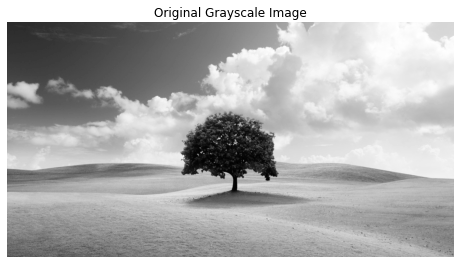

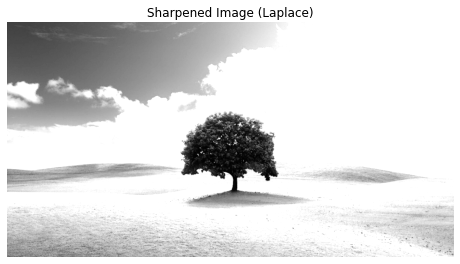

In [43]:
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.figure(figsize=(8, 6))
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image (Laplace)')
plt.axis('off')

In [44]:
# User-defined
def sharpen(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    
    # Convert Laplacian result to the same data type as the original image
    laplacian = np.uint8(np.absolute(laplacian))
    
    # Add the Laplacian result to the original image for sharpening
    sharpened_image = cv2.addWeighted(image, 1.5, laplacian, -0.5, 0)
    
    return sharpened_image

In [46]:
sharpened_image = sharpen(image)

Text(0.5, 1.0, 'Sharpened Image (Laplace)')

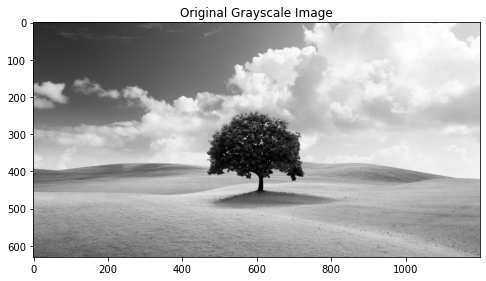

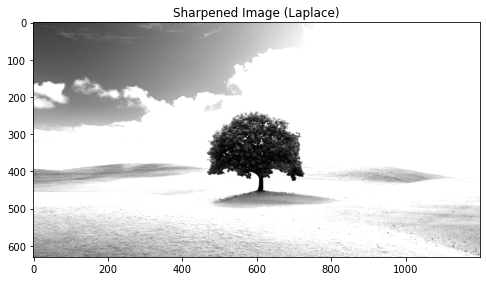

In [48]:
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')

plt.figure(figsize=(8, 6))
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image (Laplace)')